In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import numpy as np

In [72]:
import date_timeUtils as dtu

In [73]:
# dummy variable for plotting time
dt_range = pd.date_range("1900-01-01 10:20:00", "1900-01-01 10:30:00", freq="2min")

In [80]:
csv_path = ".."
csv_name = "Biogeochemistry/*.csv"

In [81]:
csv_list = dtu.get_file_paths(csv_path, csv_name, False)

In [83]:
N_blank_df = pd.read_csv(csv_list['Biogeochemistry'][2])

In [84]:
bg_mean = pd.concat([N_blank_df['Cl mg/L'].iloc[:2], N_blank_df['Cl mg/L'].iloc[-2:]]).mean()

In [85]:
N_blank_df['Cl_bg_corrected'] = N_blank_df['Cl mg/L'] - bg_mean
N_blank_df['N:Cl'] = N_blank_df['N-NO3 mg/L'] / N_blank_df['Cl_bg_corrected']

In [86]:
# Part 2
reach_length = 70 # m
cl_N_ratio = 0.0543 # unitless
N_blank_df['S_w'] = -1 / ((N_blank_df['N:Cl'] - cl_N_ratio) / reach_length) # m

In [87]:
width = 0.25 # m
Q = 2.83 * 60 # L min-1
# step 1
N_blank_df['no3_conc'] = cl_N_ratio * N_blank_df['Cl_bg_corrected']
# step 2
N_blank_df['N_add-dyn'] = np.sqrt(N_blank_df['N-NO3 mg/L'] * N_blank_df['no3_conc'])
# step 3 - final units: mg m-2 min-1. Converted to ug in the plotting function (cell 16)
N_blank_df['U_add'] = (Q / width) * (N_blank_df['N_add-dyn'] / N_blank_df['S_w'])

In [88]:
N_blank_df['Time_collected'] = pd.to_datetime(N_blank_df['Time_collected'], format='%H:%M:%S')
N_blank_df

,Reach,Sample,Injection,Date_collected,Time_collected,Cl mg/L,N-NO3 mg/L,Cl_bg_corrected,N:Cl,S_w,no3_conc,N_add-dyn,U_add
0,1,Bottom BG1,N,1/17/19,1900-01-01 09:30:00,0.61,0.00,-0.02,-0.000000,1289.134438,-0.001086,-0.000000,-0.000000
1,1,Top BG1,N,1/17/19,1900-01-01 09:35:00,0.64,0.00,0.01,0.000000,1289.134438,0.000543,0.000000,0.000000
2,1,1,N,1/17/19,1900-01-01 10:20:30,0.60,0.00,-0.03,-0.000000,1289.134438,-0.001629,-0.000000,-0.000000
3,1,2,N,1/17/19,1900-01-01 10:21:22,0.59,0.00,-0.04,-0.000000,1289.134438,-0.002172,-0.000000,-0.000000
4,1,3,N,1/17/19,1900-01-01 10:22:59,1.41,0.07,0.78,0.089744,-1974.969254,0.042354,0.054450,-0.018726
5,1,4,N,1/17/19,1900-01-01 10:23:09,7.31,0.39,6.68,0.058383,-17143.276140,0.362724,0.376115,-0.014901
6,1,5,N,1/17/19,1900-01-01 10:23:14,13.38,0.70,12.75,0.054902,-116286.644951,0.692325,0.696152,-0.004066
7,1,6,N,1/17/19,1900-01-01 10:23:20,25.71,1.29,25.08,0.051435,24436.278604,1.361844,1.325435,0.036840
8,1,7,N,1/17/19,1900-01-01 10:23:25,35.83,1.84,35.20,0.052273,34529.147982,1.911360,1.875341,0.036889
9,1,8,N,1/17/19,1900-01-01 10:23:29,45.75,2.36,45.12,0.052305,35087.095627,2.450016,2.404587,0.046547


/var/folders/40/_y1x921s259fffptgdb3lw1m0000gn/T/ipykernel_78132/1510671562.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


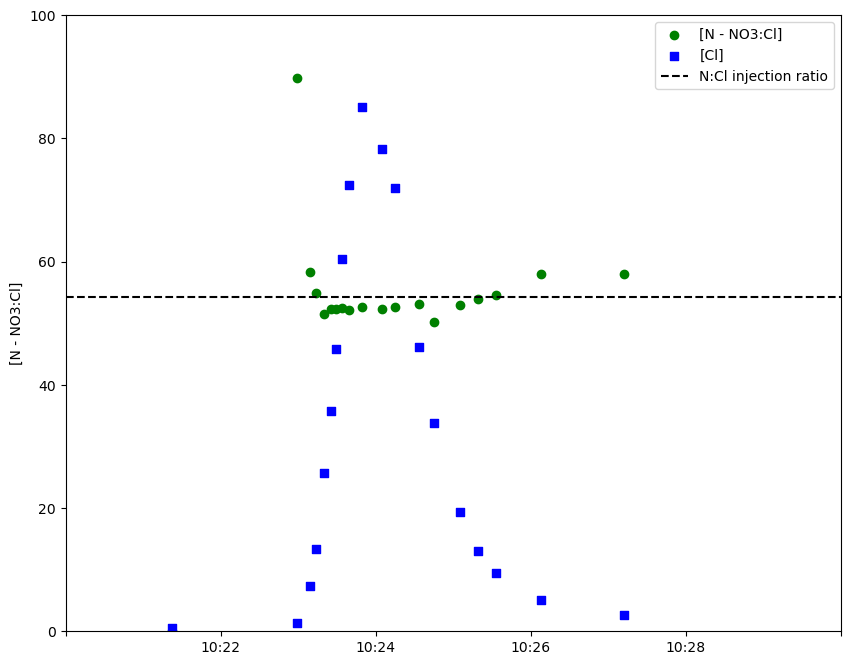

In [92]:
fig, ax = plt.subplots(figsize=(10, 8))
# units converted from mg to ug here
ax.scatter(N_blank_df.loc[3:21, 'Time_collected'], N_blank_df.loc[3:21, 'N:Cl'] * 1000, marker="o", color='g', label='[N - NO3:Cl]')
ax.scatter(N_blank_df.loc[3:21, 'Time_collected'], N_blank_df.loc[3:21, 'Cl mg/L'], marker="s", color='b', label='[Cl]')
plt.axhline(cl_N_ratio* 1000, linestyle='dashed', c='black', label='N:Cl injection ratio')
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(dt_range[0], dt_range[-1])
ax.set_ylim(0, 100)
labels = [item.get_text() for item in ax.get_xticklabels()]
if labels:
    labels[0] = ""
    labels[-1] = ""
    ax.set_xticklabels(labels)
ax.set_ylabel('[N - NO3:Cl]')
ax.legend()
plt.show()

Figure 1. 

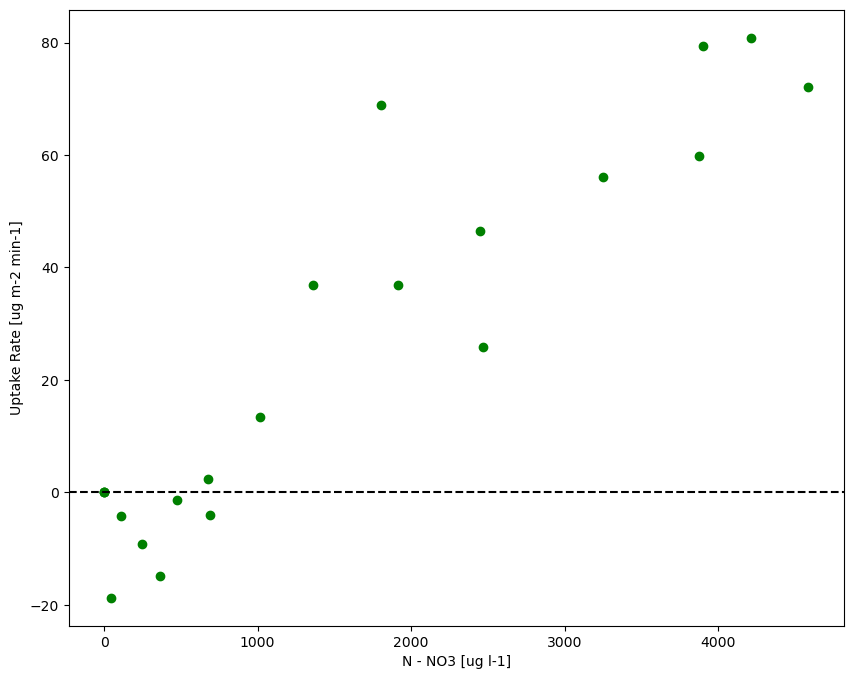

In [90]:
fig, ax = plt.subplots(figsize=(10, 8))
# units converted from mg to ug here
ax.scatter(N_blank_df.loc[2:22, 'no3_conc'] * 1000,N_blank_df.loc[2:22,'U_add'] * 1000, marker="o", color='g')
plt.axhline(0, linestyle='dashed', c='black')
ax.set_xlabel('N - NO3 [ug l-1]')
ax.set_ylabel('Uptake Rate [ug m-2 min-1]')
plt.show()


Figure 2. This calculation assumes uniform P concentration, bulk soil density, and depth across a very large area so does not capture the spatial variability P concentrations throughout the study area. This calculation doesn't consider change over time which may be significant for the wheat cultivated pasture since the majority of the P is contained in plants the concentrations of P might vary seasonally.
The amount of P in the cultivated field was lower relative to the pasture field, if the only difference in P content was the cultivation strategy then regular additions of plant matter to the wheat cultivated field would help to increase the overall concentration of P in the soil.    